![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [73]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare, levene, t, mannwhitneyu


In [2]:
men_results = pd.read_csv('men_results.csv', index_col=0)
men_results['tot_score'] = men_results['home_score'] + men_results['away_score'] 
men_results['gender'] = 'Men'
men_results

,date,home_team,away_team,home_score,away_score,tournament,tot_score,gender
0,1872-11-30,Scotland,England,0,0,Friendly,0,Men
1,1873-03-08,England,Scotland,4,2,Friendly,6,Men
2,1874-03-07,Scotland,England,2,1,Friendly,3,Men
3,1875-03-06,England,Scotland,2,2,Friendly,4,Men
4,1876-03-04,Scotland,England,3,0,Friendly,3,Men
...,...,...,...,...,...,...,...,...
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,1,Men
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,1,Men
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3,Men
44351,2022-12-17,Singapore,Maldives,3,1,Friendly,4,Men


In [3]:
women_results = pd.read_csv('women_results.csv', index_col=0)
women_results['tot_score'] = women_results['home_score'] + women_results['away_score'] 
women_results['gender'] = 'Women'
women_results

,date,home_team,away_team,home_score,away_score,tournament,tot_score,gender
0,1969-11-01,Italy,France,1,0,Euro,1,Women
1,1969-11-01,Denmark,England,4,3,Euro,7,Women
2,1969-11-02,England,France,2,0,Euro,2,Women
3,1969-11-02,Italy,Denmark,3,1,Euro,4,Women
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,5,Women
...,...,...,...,...,...,...,...,...
4879,2022-07-22,Sweden,Belgium,1,0,UEFA Euro,1,Women
4880,2022-07-23,France,Netherlands,1,0,UEFA Euro,1,Women
4881,2022-07-26,England,Sweden,4,0,UEFA Euro,4,Women
4882,2022-07-27,Germany,France,2,1,UEFA Euro,3,Women


In [4]:
# common tournaments between men and women

men_tournaments = men_results['tournament'].unique()
women_tournaments = women_results['tournament'].unique()

common_tournaments = [tournament for tournament in men_tournaments if tournament in women_tournaments]
common_tournaments

['Friendly',
 'Copa América',
 'FIFA World Cup',
 'FIFA World Cup qualification',
 'AFC Asian Cup qualification',
 'AFC Asian Cup',
 'African Cup of Nations',
 'UEFA Euro qualification',
 'UEFA Euro',
 'African Cup of Nations qualification',
 'CONCACAF Championship',
 'Tournoi de France']

In [5]:
# create a dataframe joining men and women

results = pd.concat([men_results, women_results])
results['common_tournament'] = results['tournament'].isin(common_tournaments)
results

,date,home_team,away_team,home_score,away_score,tournament,tot_score,gender,common_tournament
0,1872-11-30,Scotland,England,0,0,Friendly,0,Men,True
1,1873-03-08,England,Scotland,4,2,Friendly,6,Men,True
2,1874-03-07,Scotland,England,2,1,Friendly,3,Men,True
3,1875-03-06,England,Scotland,2,2,Friendly,4,Men,True
4,1876-03-04,Scotland,England,3,0,Friendly,3,Men,True
...,...,...,...,...,...,...,...,...,...
4879,2022-07-22,Sweden,Belgium,1,0,UEFA Euro,1,Women,True
4880,2022-07-23,France,Netherlands,1,0,UEFA Euro,1,Women,True
4881,2022-07-26,England,Sweden,4,0,UEFA Euro,4,Women,True
4882,2022-07-27,Germany,France,2,1,UEFA Euro,3,Women,True


In [53]:
results['date'] = pd.to_datetime(results['date'])
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49237 entries, 0 to 4883
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               49237 non-null  datetime64[ns]
 1   home_team          49237 non-null  object        
 2   away_team          49237 non-null  object        
 3   home_score         49237 non-null  int64         
 4   away_score         49237 non-null  int64         
 5   tournament         49237 non-null  object        
 6   tot_score          49237 non-null  int64         
 7   gender             49237 non-null  object        
 8   common_tournament  49237 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(4)
memory usage: 3.4+ MB


In [6]:
# average total score by common tournaments

grouped_scores = results[results['common_tournament']==True].groupby(['gender', 'tournament'])['tot_score'].mean()

grouped_scores = grouped_scores.reset_index() # Reset the index to convert the grouped data into a DataFrame
grouped_scores


,gender,tournament,tot_score
0,Men,AFC Asian Cup,2.667568
1,Men,AFC Asian Cup qualification,3.315445
2,Men,African Cup of Nations,2.384615
3,Men,African Cup of Nations qualification,2.432712
4,Men,CONCACAF Championship,2.662722
5,Men,Copa América,3.175981
6,Men,FIFA World Cup,2.821577
7,Men,FIFA World Cup qualification,2.896928
8,Men,Friendly,2.881843
9,Men,Tournoi de France,2.900000


In [7]:
# Unstack the DataFrame (long to wide), to add the score_difference column

# Set the index to ['tournament', 'gender']
grouped_scores.set_index(['tournament', 'gender'], inplace=True)

# Unstack the 'gender' level
unstacked_grouped_scores = grouped_scores.unstack(level='gender')

# Rename the columns
unstacked_grouped_scores.columns = ['tot_score_men', 'tot_score_women']

# Reset the index to make 'tournament' a column again
unstacked_grouped_scores.reset_index(inplace=True)

# Calculate tot_score_difference between woment and men
unstacked_grouped_scores['tot_score_diff'] = unstacked_grouped_scores['tot_score_women'] - unstacked_grouped_scores['tot_score_men']
unstacked_grouped_scores

,tournament,tot_score_men,tot_score_women,tot_score_diff
0,AFC Asian Cup,2.667568,3.747748,1.080180
1,AFC Asian Cup qualification,3.315445,5.163121,1.847676
2,African Cup of Nations,2.384615,3.187500,0.802885
3,African Cup of Nations qualification,2.432712,3.758621,1.325908
4,CONCACAF Championship,2.662722,6.404762,3.742040
5,Copa América,3.175981,4.664122,1.488141
6,FIFA World Cup,2.821577,3.228873,0.407296
7,FIFA World Cup qualification,2.896928,3.395349,0.498421
8,Friendly,2.881843,4.018018,1.136175
9,Tournoi de France,2.900000,2.416667,-0.483333


In [8]:
# Melt again the DataFrame (wide to long) for plotting

melted_grouped_scores = unstacked_grouped_scores.melt(id_vars=['tournament','tot_score_diff'], value_vars=['tot_score_men', 'tot_score_women'], var_name='gender', value_name='tot_score')
melted_grouped_scores

# Rename the 'gender' values for better readability
melted_grouped_scores['gender'] = melted_grouped_scores['gender'].replace({'tot_score_men': 'Men', 'tot_score_women': 'Women'})

# sort the dataframe by tot_score_diff for better visualization
melted_grouped_scores = melted_grouped_scores.sort_values(by='tot_score_diff', ascending=False)
melted_grouped_scores

,tournament,tot_score_diff,gender,tot_score
4,CONCACAF Championship,3.742040,Men,2.662722
16,CONCACAF Championship,3.742040,Women,6.404762
1,AFC Asian Cup qualification,1.847676,Men,3.315445
13,AFC Asian Cup qualification,1.847676,Women,5.163121
5,Copa América,1.488141,Men,3.175981
17,Copa América,1.488141,Women,4.664122
3,African Cup of Nations qualification,1.325908,Men,2.432712
15,African Cup of Nations qualification,1.325908,Women,3.758621
20,Friendly,1.136175,Women,4.018018
8,Friendly,1.136175,Men,2.881843


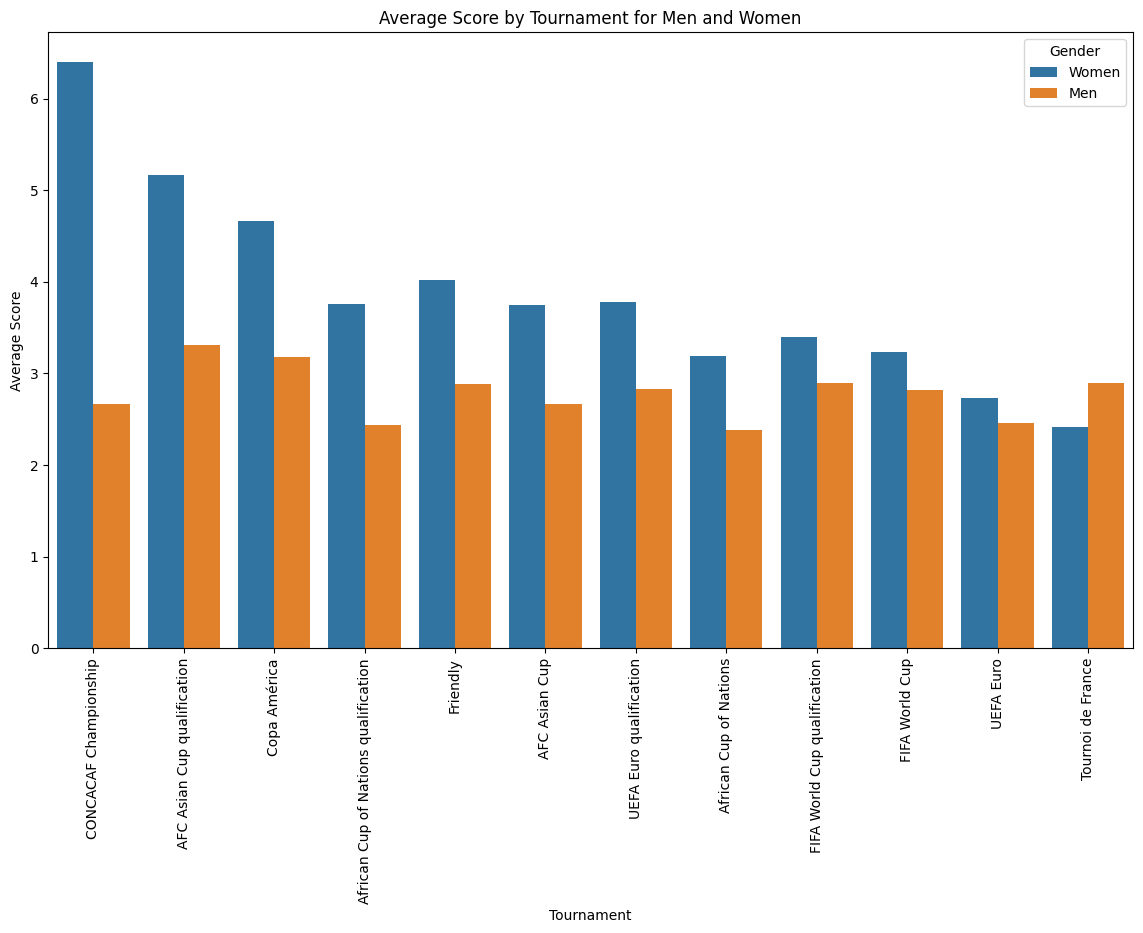

In [9]:
# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='tournament', y='tot_score', hue='gender', hue_order=['Women', 'Men'], data=melted_grouped_scores)

plt.xticks(rotation=90)
plt.xlabel('Tournament')
plt.ylabel('Average Score')
plt.title('Average Score by Tournament for Men and Women')
plt.legend(title='Gender')
plt.show()

([<matplotlib.patches.Wedge at 0x27360220e50>,
 [Text(-1.0470198554916292, 0.3372675825013251, 'Men'),
  Text(1.0470198554916292, -0.33726758250132477, 'Women')],
 [Text(-0.5711017393590704, 0.18396413590981367, '90.1%'),
  Text(0.5711017393590705, -0.18396413590981348, '9.9%')])

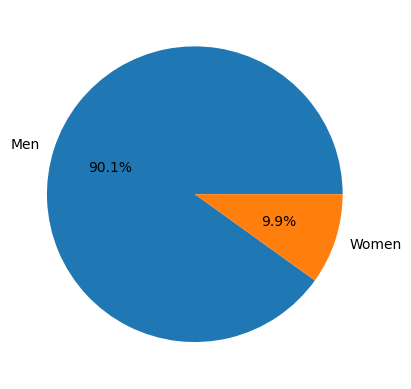

In [10]:
gender_counts = results['gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

In [11]:
top_categories = results['tournament'].value_counts().nlargest(10).index
top_categories_men = men_results['tournament'].value_counts().nlargest(10).index
top_categories_women = women_results['tournament'].value_counts().nlargest(10).index

top_categories

Index(['Friendly', 'FIFA World Cup qualification', 'UEFA Euro qualification',
       'African Cup of Nations qualification', 'FIFA World Cup',
       'Copa América', 'AFC Asian Cup qualification', 'African Cup of Nations',
       'CECAFA Cup', 'CFU Caribbean Cup qualification'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 tournament categories All Genders')

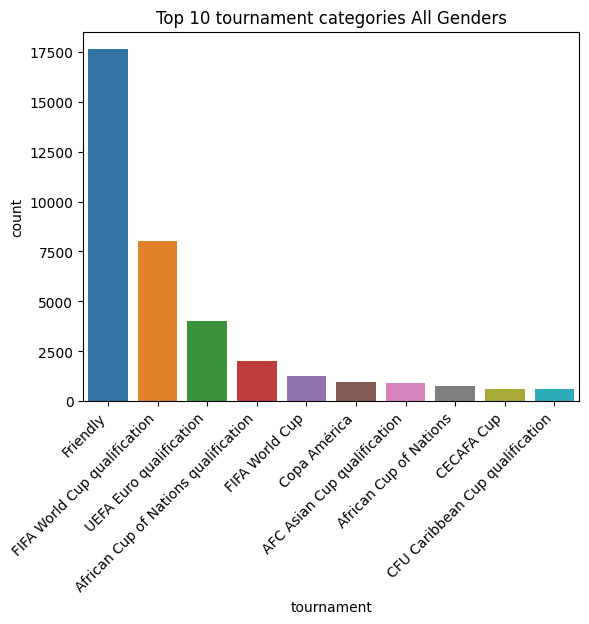

In [12]:
sns.countplot(x = results[results['tournament'].isin(top_categories)]['tournament'], order=top_categories)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 tournament categories All Genders')

Text(0.5, 1.0, 'Top 10 tournament categories Men')

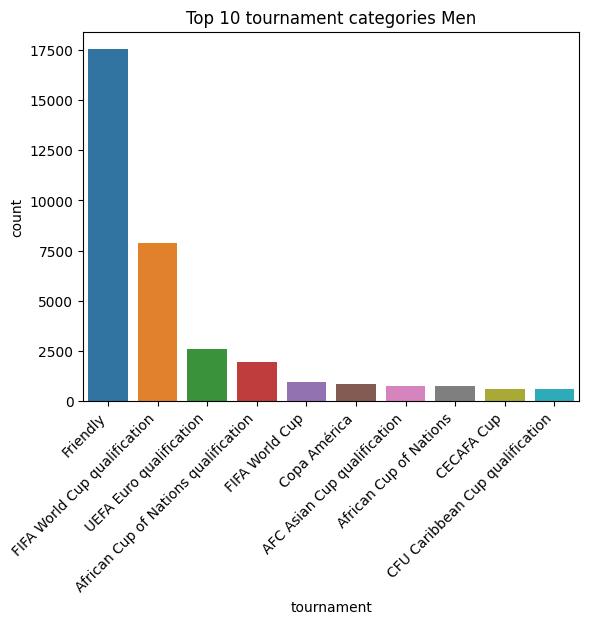

In [13]:
sns.countplot(x = men_results[men_results['tournament'].isin(top_categories_men)]['tournament'], order=top_categories_men)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 tournament categories Men')

Text(0.5, 1.0, 'Top 10 tournament categories Women')

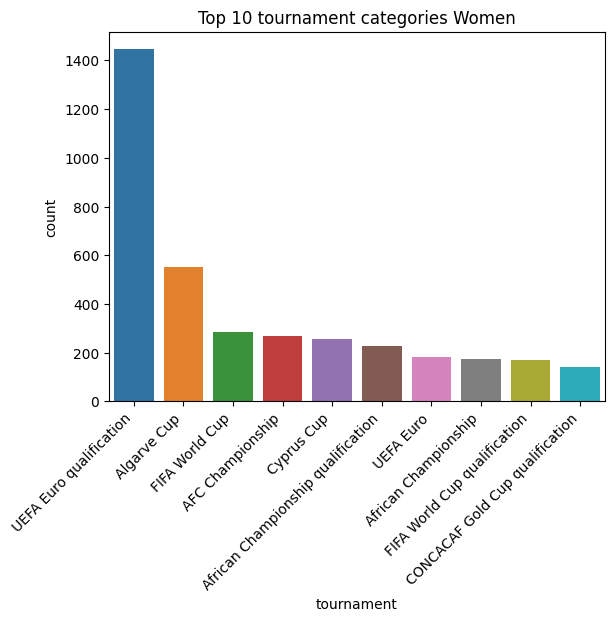

In [14]:
sns.countplot(x = women_results[women_results['tournament'].isin(top_categories_women)]['tournament'], order=top_categories_women)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 tournament categories Women')

In [15]:
# There are no many friendly competitions for women. So we create another dataframe 'men_results_competitions', eliminating the category 'Friendly' from the men tournaments

men_results_compet = men_results[men_results['tournament'] != 'Friendly']

men_results_compet

,date,home_team,away_team,home_score,away_score,tournament,tot_score,gender
29,1884-01-26,Northern Ireland,Scotland,0,5,British Home Championship,5,Men
30,1884-02-09,Wales,Northern Ireland,6,0,British Home Championship,6,Men
31,1884-02-23,Northern Ireland,England,1,8,British Home Championship,9,Men
32,1884-03-15,Scotland,England,1,0,British Home Championship,1,Men
33,1884-03-17,Wales,England,0,4,British Home Championship,4,Men
...,...,...,...,...,...,...,...,...
44343,2022-12-10,England,France,1,2,FIFA World Cup,3,Men
44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,3,Men
44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,2,Men
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3,Men


Text(0.5, 1.0, 'Top 10 tournament categories Men - Only Competitions')

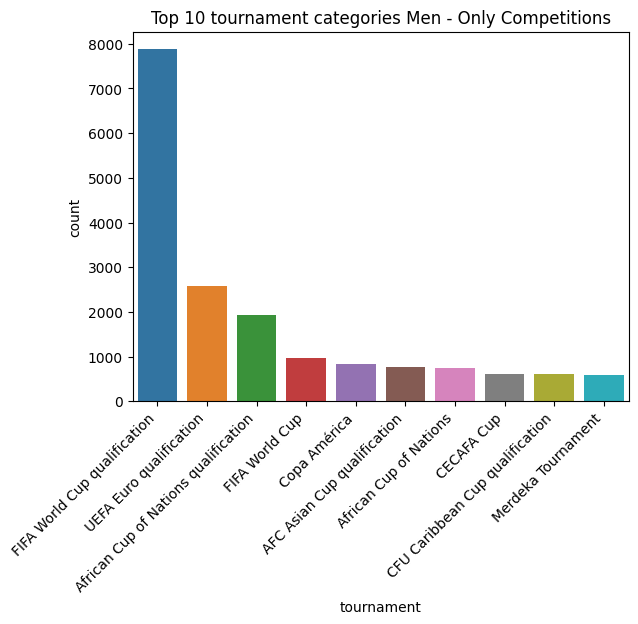

In [16]:
top_categories_men_compet = men_results_compet['tournament'].value_counts().nlargest(10).index
sns.countplot(x = men_results_compet[men_results_compet['tournament'].isin(top_categories_men_compet)]['tournament'], order=top_categories_men_compet)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 tournament categories Men - Only Competitions')

In [17]:
# create a dataframe joining men (only competitions) and women

results_compet = pd.concat([men_results_compet, women_results])
results_compet

,date,home_team,away_team,home_score,away_score,tournament,tot_score,gender
29,1884-01-26,Northern Ireland,Scotland,0,5,British Home Championship,5,Men
30,1884-02-09,Wales,Northern Ireland,6,0,British Home Championship,6,Men
31,1884-02-23,Northern Ireland,England,1,8,British Home Championship,9,Men
32,1884-03-15,Scotland,England,1,0,British Home Championship,1,Men
33,1884-03-17,Wales,England,0,4,British Home Championship,4,Men
...,...,...,...,...,...,...,...,...
4879,2022-07-22,Sweden,Belgium,1,0,UEFA Euro,1,Women
4880,2022-07-23,France,Netherlands,1,0,UEFA Euro,1,Women
4881,2022-07-26,England,Sweden,4,0,UEFA Euro,4,Women
4882,2022-07-27,Germany,France,2,1,UEFA Euro,3,Women


([<matplotlib.patches.Wedge at 0x273606f6740>,
 [Text(-0.9737834012101219, 0.5116110705679139, 'Men'),
  Text(0.9737833772598778, -0.5116111161540048, 'Women')],
 [Text(-0.5311545824782482, 0.2790605839461348, '84.6%'),
  Text(0.5311545694144788, -0.2790606088112753, '15.4%')])

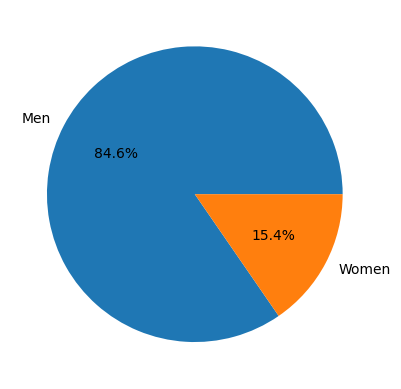

In [18]:
gender_counts_compet = results_compet['gender'].value_counts()

plt.pie(gender_counts_compet, labels=gender_counts_compet.index, autopct='%1.1f%%')

In [29]:

# apply chi square goodness of fit to check if there is a significant imbalance between men and women

# Count the number of records for each gender
gender_counts = results['gender'].value_counts()
print('actual counts:', gender_counts, '\n****************************************')

# Define the expected distribution (e.g., equal distribution)
expected_counts = [np.ceil(len(results) / 2), np.floor(len(results) / 2)]
print('expected counts:', expected_counts)


actual counts: Men      44353
Women     4884
Name: gender, dtype: int64 
****************************************
expected counts: [24619.0, 24618.0]


In [33]:
# Perform the Chi-Square Goodness of Fit Test
chi2, p = chisquare(f_obs=gender_counts, f_exp=expected_counts)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpret the result
if p < 0.05:
    print("There is a statistically significant imbalance between the number of records for men and women.")
else:
    print("There is no statistically significant imbalance between the number of records for men and women.")

Chi-Square Statistic: 31637.244849250565
P-Value: 0.0
There is a statistically significant imbalance between the number of records for men and women.


In [39]:
# apply Levene test to check for heteroscedasticity, then decide if to use the Welch or Student T test

# Separate the scores by gender
men_scores = results[results['gender'] == 'Men']['tot_score']
women_scores = results[results['gender'] == 'Women']['tot_score']

# Perform Levene's test
stat, p_value = levene(men_scores, women_scores)

print(f"Levene's Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")

Levene's Test Statistic: 309.72582760733775
P-Value: 4.0829508280646485e-69
The variances are significantly different.


In [43]:
men_scores_size = len(men_scores)
women_scores_size = len(women_scores)

print('men sample size:', men_scores_size)
print('women sample mean:', women_scores_size)

men_scores_mean = men_scores.mean()
women_scores_mean = women_scores.mean()

print('men mean:', men_scores_mean)
print('women mean:', women_scores_mean)

men_scores_var = men_scores.var()
women_scores_var = women_scores.var()

print('men variance:', men_scores_var)
print('women variance:', women_scores_var)


men sample size: 44353
women sample mean: 4884
men mean: 2.9193515658467297
women mean: 3.704135954135954
men variance: 4.329151347200437
women variance: 7.786908960419098


In [47]:
# given a statistically significant difference in sample size and in variance, we apply a weighted Welch's independent t-test

# Calculate the t-statistic
t_stat = (men_scores_mean - women_scores_mean) / np.sqrt((men_scores_var / men_scores_size) + (women_scores_var / women_scores_size))

# Calculate the degrees of freedom using the Welch-Satterthwaite equation
DoF = ((men_scores_var / men_scores_size) + (women_scores_var / women_scores_size))**2 / (((men_scores_var / men_scores_size)**2 / (men_scores_size - 1)) + ((women_scores_var / women_scores_size)**2 / (women_scores_size - 1)))

# Calculate the p-value (one tailed test, to check if the test statistic is grater than the critical value)
p_value = 1 - t.cdf(t_stat, DoF)

print(f"T-Statistic: {t_stat}")
print(f"Degrees of Freedom: {DoF}")
print(f"P-Value: {p_value}")


T-Statistic: -19.078885755425084
Degrees of Freedom: 5496.902925774675
P-Value: 1.0


In [50]:
# Interpret the result
if p_value < 0.10:
    print("There is a statistically significant difference in the average number of goals between men and women.")
else:
    print("There is no statistically significant difference in the average number of goals between men and women.")

There is no statistically significant difference in the average number of goals between men and women.


In [58]:
results

,date,home_team,away_team,home_score,away_score,tournament,tot_score,gender,common_tournament
0,1872-11-30,Scotland,England,0,0,Friendly,0,Men,True
1,1873-03-08,England,Scotland,4,2,Friendly,6,Men,True
2,1874-03-07,Scotland,England,2,1,Friendly,3,Men,True
3,1875-03-06,England,Scotland,2,2,Friendly,4,Men,True
4,1876-03-04,Scotland,England,3,0,Friendly,3,Men,True
...,...,...,...,...,...,...,...,...,...
4879,2022-07-22,Sweden,Belgium,1,0,UEFA Euro,1,Women,True
4880,2022-07-23,France,Netherlands,1,0,UEFA Euro,1,Women,True
4881,2022-07-26,England,Sweden,4,0,UEFA Euro,4,Women,True
4882,2022-07-27,Germany,France,2,1,UEFA Euro,3,Women,True


In [62]:
# filtering the data for only "FIFA World Cup" and from 2002

results_filtered = results[(results['date'] >= '2002') & (results['tournament'] == 'FIFA World Cup')]
results_filtered

,date,home_team,away_team,home_score,away_score,tournament,tot_score,gender,common_tournament
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,Men,True
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,Men,True
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,Men,True
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,Men,True
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,Men,True
...,...,...,...,...,...,...,...,...,...
4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,3,Women,True
4466,2019-07-02,England,United States,1,2,FIFA World Cup,3,Women,True
4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,1,Women,True
4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,3,Women,True


In [64]:
men_scores_filt = results_filtered[results_filtered['gender'] == 'Men']['tot_score']
women_scores_filt = results_filtered[results_filtered['gender'] == 'Women']['tot_score']

filt_men_scores_size = len(men_scores_filt)
filt_women_scores_size = len(women_scores_filt)

print('men sample size:', filt_men_scores_size)
print('women sample mean:', filt_women_scores_size)

filt_men_scores_mean = men_scores_filt.mean()
filt_women_scores_mean = women_scores_filt.mean()

print('men mean:', filt_men_scores_mean)
print('women mean:', filt_women_scores_mean)

filt_men_scores_var = men_scores_filt.var()
filt_women_scores_var = women_scores_filt.var()

print('men variance:', filt_men_scores_var)
print('women variance:', filt_women_scores_var)

men sample size: 384
women sample mean: 200
men mean: 2.5130208333333335
women mean: 2.98
men variance: 2.7309005113141867
women variance: 4.09005025125628


([<matplotlib.patches.Wedge at 0x27366416950>,
 [Text(-0.5224461643753513, 0.9680134324117013, 'Men'),
  Text(0.5224461643753512, -0.9680134324117015, 'Women')],
 [Text(-0.2849706351138279, 0.5280073267700188, '65.8%'),
  Text(0.28497063511382786, -0.5280073267700189, '34.2%')])

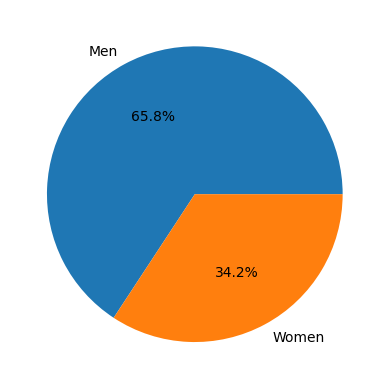

In [65]:
gender_counts_filt = results_filtered['gender'].value_counts()

plt.pie(gender_counts_filt, labels=gender_counts_filt.index, autopct='%1.1f%%')

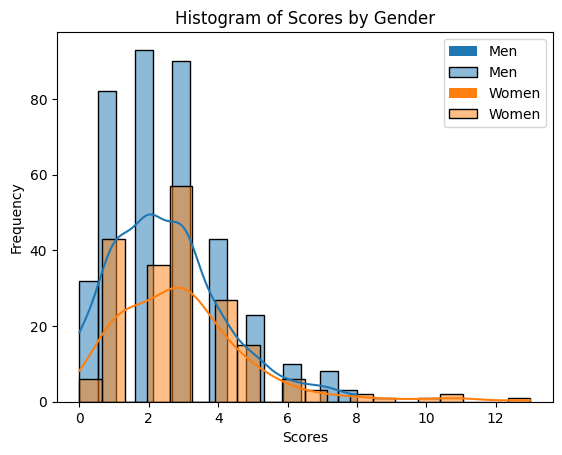

In [72]:
# check distribution of the outcome, to determine it to apply parametric or non-parametric statistical tests

sns.histplot(men_scores_filt, label='Men', kde=True)
sns.histplot(women_scores_filt, label='Women', kde=True)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Scores by Gender')
plt.legend()

In [82]:
# Perform the Mann-Whitney U test (right-tailed: checking if women_scores_filt is greater than men_scores_filt)
stat, p = mannwhitneyu(women_scores_filt, men_scores_filt, alternative='greater')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret the result
alpha = 0.10
if p < alpha:
    print('Reject the null hypothesis (women score more than men)')
    r = 'reject'
else:
    print('Fail to reject the null hypothesis (no significant difference between women and men score)')
    r = 'fail to reject'

Statistics=43273.000, p=0.005
Reject the null hypothesis (women score more than men)


In [ ]:
# The p-value and the result of the test must be stored in a dictionary called result_dict in the form:
# result_dict = {"p_val": p_val, "result": result}
# where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.

In [84]:
result_dict = {"p_val": p, "result": r}
result_dict

{'p_val': 0.005106609825443641, 'result': 'rejected'}